### Step 0: Imports and Reading Data


In [23]:
import kagglehub

path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

Path to dataset files: /Users/kaancakir/.cache/kagglehub/datasets/anandshaw2001/netflix-movies-and-tv-shows/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [24]:
df = pd.read_csv(f'{path}/netflix_titles.csv')


In [9]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Step 1: Data Understanding


In [10]:
df.shape

(8807, 12)

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.head()

,id,type,title,director,country,releaseYear,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min,Documentaries
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,127 min,"Dramas, International Movies"


### Step 2: Data Preperation


In [26]:
df.drop(['cast', 'date_added', 'rating', 'description'], axis=1, inplace=True)

In [28]:
df.rename(columns={'show_id': 'id'}, inplace=True)
df.rename(columns={'release_year': 'releaseYear'}, inplace=True)
df.rename(columns={'listed_in': 'category'}, inplace=True)


In [32]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

id             0
type           0
title          0
director       0
country        0
releaseYear    0
duration       0
category       0
dtype: int64

In [36]:
df

,id,type,title,director,country,releaseYear,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min,Documentaries
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,96 min,"Dramas, International Movies, Thrillers"
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,88 min,"Children & Family Movies, Comedies"


### Step 3: Feature Understanding


In [38]:
df

,id,type,title,director,country,releaseYear,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min,Documentaries
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,96 min,"Dramas, International Movies, Thrillers"
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,88 min,"Children & Family Movies, Comedies"


In [39]:
df['type'].value_counts()

type
Movie      5559
TV Show     189
Name: count, dtype: int64

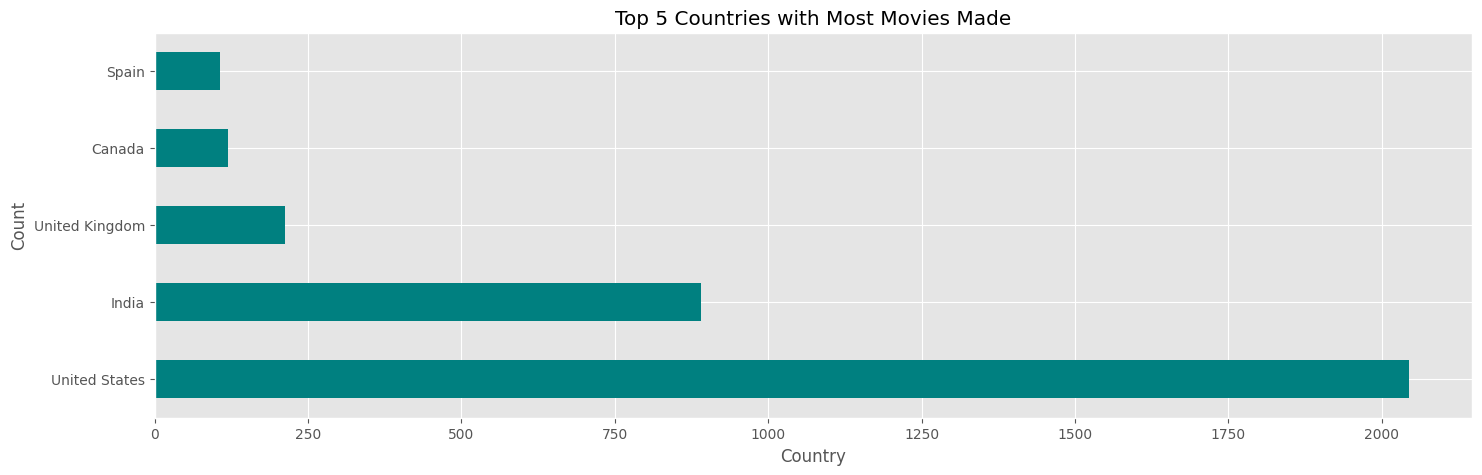

In [45]:
ax = df['country'].value_counts().head(5).plot(kind='barh', figsize=(17,5), color = 'teal')

ax.set_xlabel('Country')
ax.set_ylabel('Count')

ax.set_title('Top 5 Countries with Most Movies Made')

plt.show()


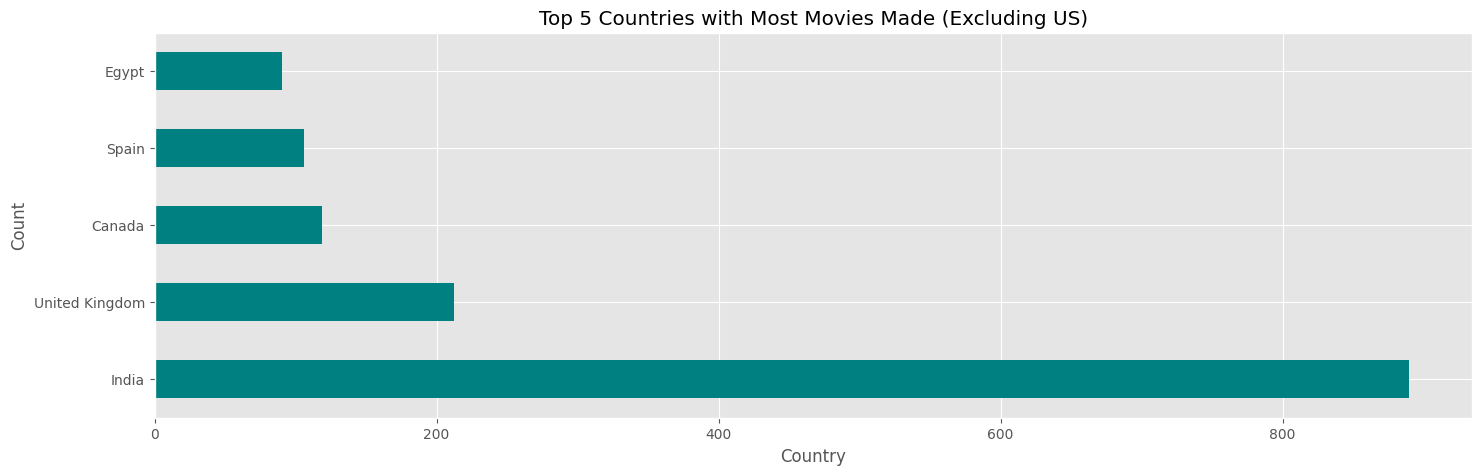

In [50]:
ax = df.query('country != "United States"')['country'].value_counts().head(5).plot(kind='barh', figsize=(17,5), color = 'teal')

ax.set_xlabel('Country')
ax.set_ylabel('Count')

ax.set_title('Top 5 Countries with Most Movies Made (Excluding US)')

plt.show()

### Step 4: Feature Relationships


In [51]:
df

,id,type,title,director,country,releaseYear,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min,Documentaries
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,96 min,"Dramas, International Movies, Thrillers"
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,88 min,"Children & Family Movies, Comedies"


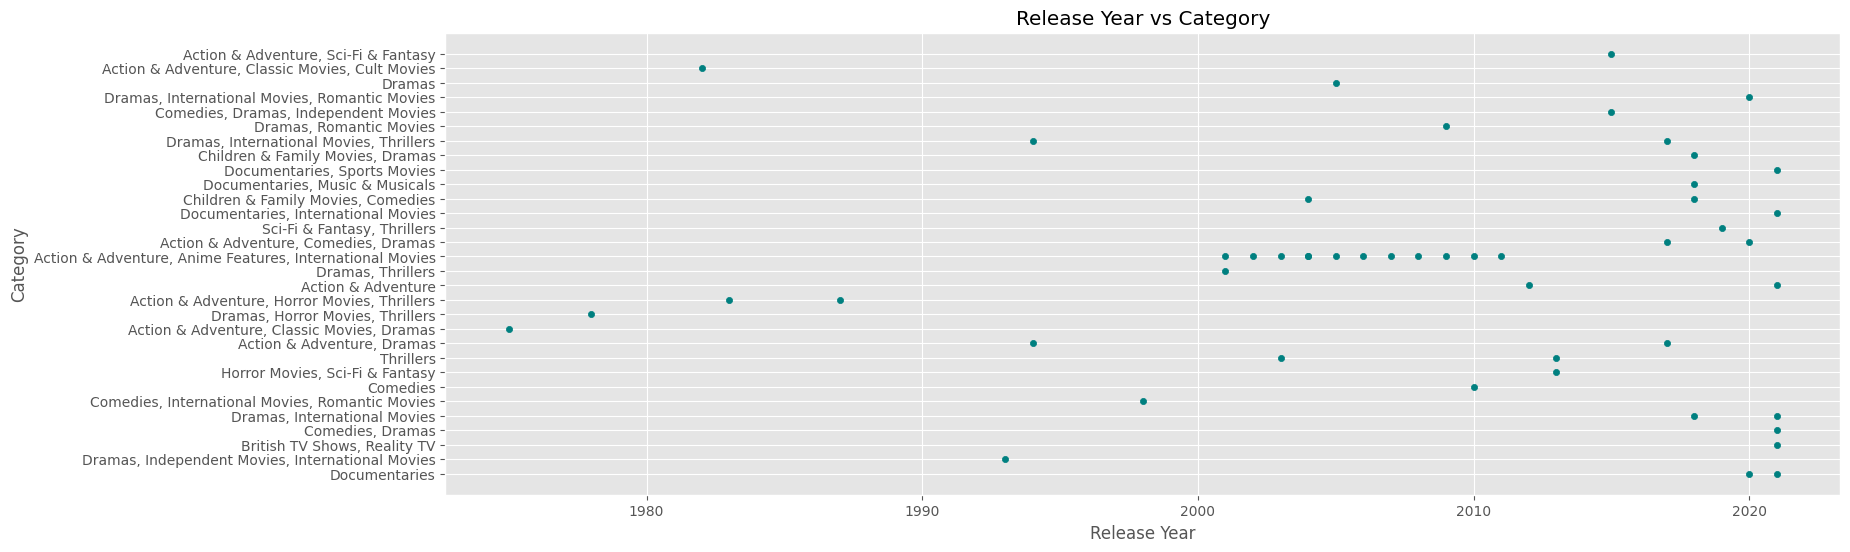

In [65]:
modified_df = df.head(50)

ax = modified_df.plot(kind='scatter', x='releaseYear', y='category', color='teal', figsize=(18, 6))

ax.set_xlabel('Release Year')
ax.set_ylabel('Category')
ax.set_title('Release Year vs Category')

plt.show()

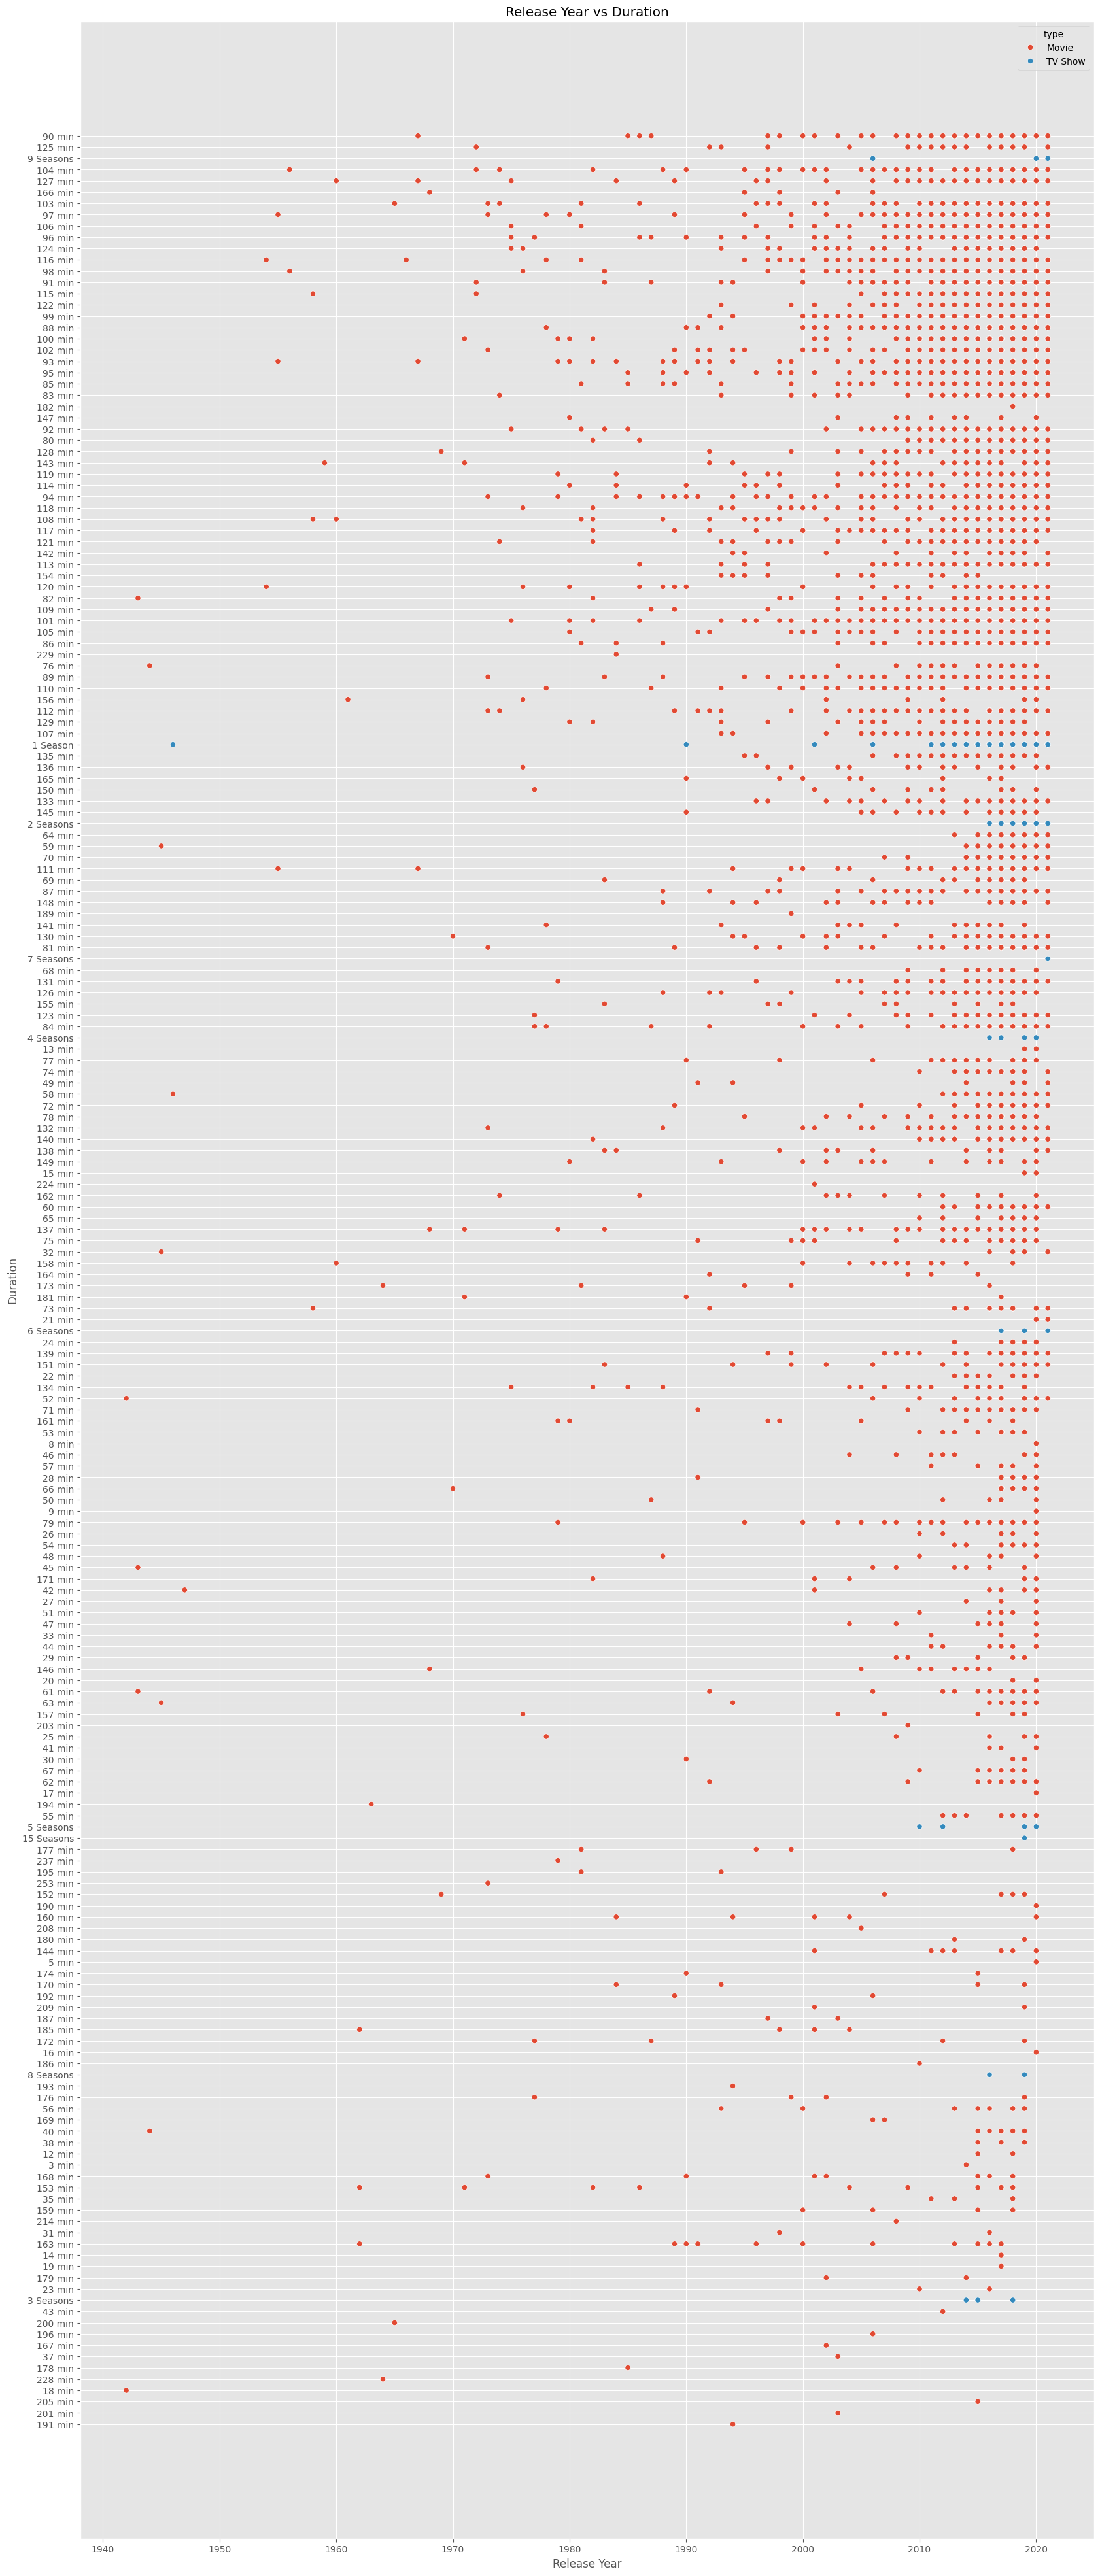

In [69]:
plt.figure(figsize=(20,50))

ax = sns.scatterplot(x='releaseYear', y='duration', hue='type', data=df)

ax.set_xlabel('Release Year')
ax.set_ylabel('Duration')
ax.set_title('Release Year vs Duration')

plt.show()


Text(0.5, 1.0, 'Movies vs Series')

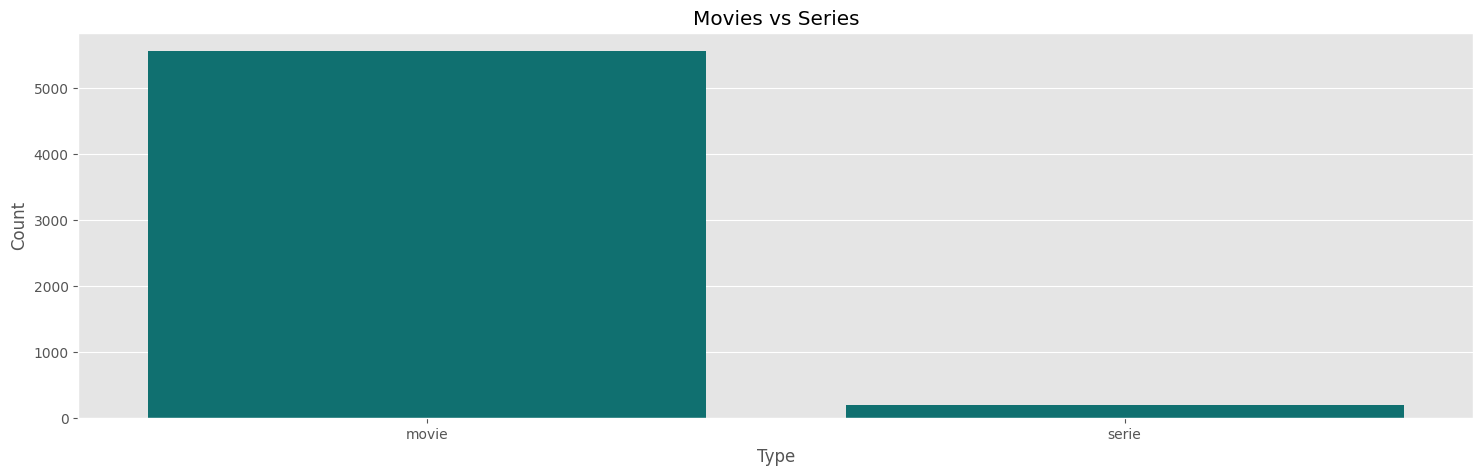

In [77]:
typeMovie = df.query('type == "Movie"').shape[0]
typeSeries = df.query('type == "TV Show"').shape[0]

plt.figure(figsize= (18,5))
ax = sns.barplot(x=['movie','serie'], y=[typeMovie, typeSeries], color = 'teal')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Movies vs Series')
